In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
#Load Data
url = 'https://api.foodsecurityportal.org/en/datastore/dump/b8b5fa2a-3613-5b88-bae0-674357d45707'   #india_price
df = pd.read_csv(url)
df.head(10)

,_id,db_id,date,commodity,unit,source_name,source_url,price,minPrice,maxPrice,percentageChange,last_sync
0,1,706799,2019-01-01,Rice,USD/Ton,FAO Global Information and Early Warning Syste...,http://www.fao.org/giews/food-prices/tool/public/,0.50,NaN,NaN,0.00,2024-10-08T15:38:09
1,2,713772,2018-12-01,Rice,USD/Ton,FAO Global Information and Early Warning Syste...,http://www.fao.org/giews/food-prices/tool/public/,0.50,NaN,NaN,2.04,2024-10-08T15:38:09
2,3,695856,2018-11-01,Rice,USD/Ton,FAO Global Information and Early Warning Syste...,http://www.fao.org/giews/food-prices/tool/public/,0.49,NaN,NaN,4.26,2024-10-08T15:38:09
3,4,678334,2018-10-01,Rice,USD/Ton,FAO Global Information and Early Warning Syste...,http://www.fao.org/giews/food-prices/tool/public/,0.47,NaN,NaN,-2.08,2024-10-08T15:38:09
4,5,762043,2018-09-01,Rice,USD/Ton,FAO Global Information and Early Warning Syste...,http://www.fao.org/giews/food-prices/tool/public/,0.48,NaN,NaN,0.00,2024-10-08T15:38:09
5,6,743896,2018-08-01,Rice,USD/Ton,FAO Global Information and Early Warning Syste...,http://www.fao.org/giews/food-prices/tool/public/,0.48,NaN,NaN,-2.04,2024-10-08T15:38:09
6,7,725465,2018-07-01,Rice,USD/Ton,FAO Global Information and Early Warning Syste...,http://www.fao.org/giews/food-prices/tool/public/,0.49,NaN,NaN,-2.00,2024-10-08T15:38:09
7,8,752161,2018-06-01,Rice,USD/Ton,FAO Global Information and Early Warning Syste...,http://www.fao.org/giews/food-prices/tool/public/,0.50,NaN,NaN,0.00,2024-10-08T15:38:09
8,9,734394,2018-05-01,Rice,USD/Ton,FAO Global Information and Early Warning Syste...,http://www.fao.org/giews/food-prices/tool/public/,0.50,NaN,NaN,-1.96,2024-10-08T15:38:09
9,10,716326,2018-04-01,Rice,USD/Ton,FAO Global Information and Early Warning Syste...,http://www.fao.org/giews/food-prices/tool/public/,0.51,NaN,NaN,-1.92,2024-10-08T15:38:09


In [3]:
df = df.drop(['_id'], axis=1)
df = df.drop(['db_id'], axis=1)
df = df.drop(['commodity'], axis=1)
df = df.drop(['unit'], axis=1)
df = df.drop(['source_name'], axis=1)
df = df.drop(['source_url'], axis=1)
df = df.drop(['minPrice'], axis=1)
df = df.drop(['maxPrice'], axis=1)
df = df.drop(['percentageChange'], axis=1)
df = df.drop(['last_sync'], axis=1)

df.head()

,date,price
0,2019-01-01,0.50
1,2018-12-01,0.50
2,2018-11-01,0.49
3,2018-10-01,0.47
4,2018-09-01,0.48


In [4]:
df.shape

(229, 2)

In [5]:
df.isnull().sum()

date     0
price    0
dtype: int64

In [6]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df = df.set_index(['date'])

In [7]:
from datetime import datetime
df.head()

,price
date,
2019-01-01,0.50
2018-12-01,0.50
2018-11-01,0.49
2018-10-01,0.47
2018-09-01,0.48


In [8]:
df.tail()

,price
date,
2000-05-01,0.29
2000-04-01,0.29
2000-03-01,0.29
2000-02-01,0.29
2000-01-01,0.29


In [9]:
conversion_rate = 85.33
df['price'] = conversion_rate * df['price']
df.head()

,price
date,
2019-01-01,42.6650
2018-12-01,42.6650
2018-11-01,41.8117
2018-10-01,40.1051
2018-09-01,40.9584


In [10]:
df = df.groupby('date')['price'].sum().reset_index()

In [11]:
df = df.set_index('date')
df.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='date', length=229, freq=None)

In [12]:
df = df['price'].resample('MS').mean()

In [13]:
df['2017':]

date
2017-01-01    37.5452
2017-02-01    40.1051
2017-03-01    40.9584
2017-04-01    41.8117
2017-05-01    41.8117
2017-06-01    41.8117
2017-07-01    41.8117
2017-08-01    42.6650
2017-09-01    41.8117
2017-10-01    41.8117
2017-11-01    43.5183
2017-12-01    44.3716
2018-01-01    45.2249
2018-02-01    44.3716
2018-03-01    44.3716
2018-04-01    43.5183
2018-05-01    42.6650
2018-06-01    42.6650
2018-07-01    41.8117
2018-08-01    40.9584
2018-09-01    40.9584
2018-10-01    40.1051
2018-11-01    41.8117
2018-12-01    42.6650
2019-01-01    42.6650
Freq: MS, Name: price, dtype: float64

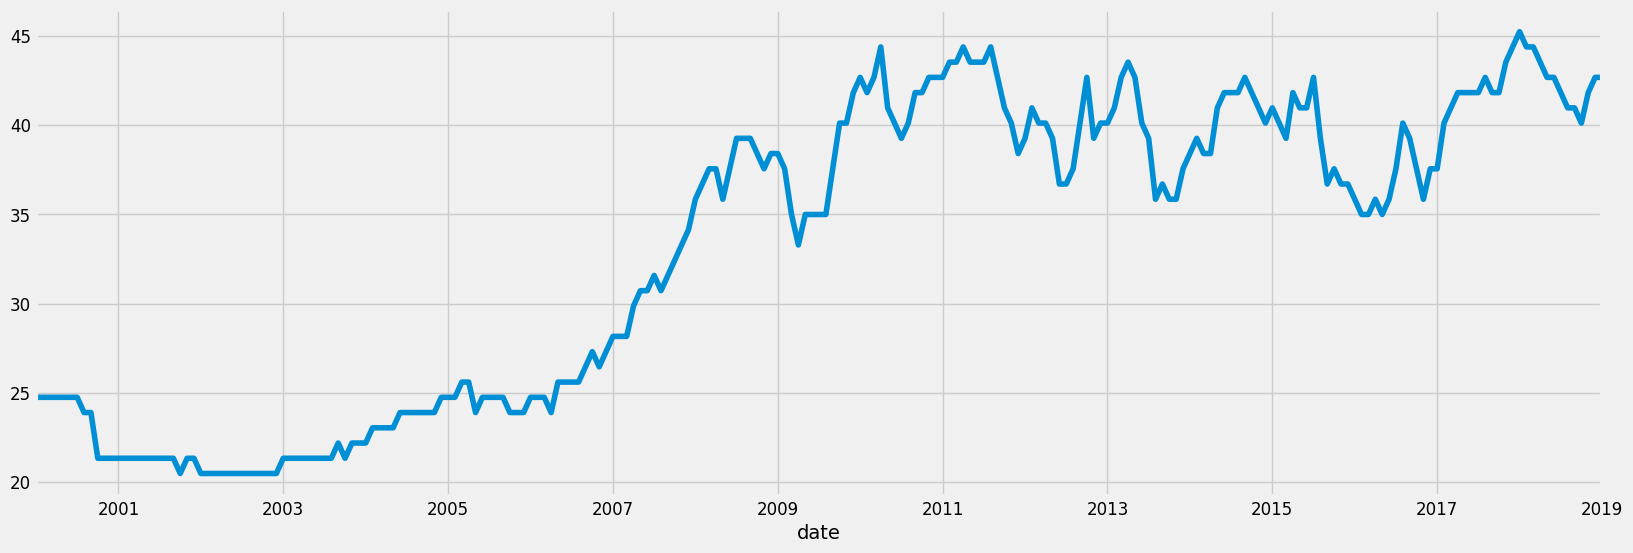

In [14]:
df.plot(figsize=(18, 6))
plt.show()

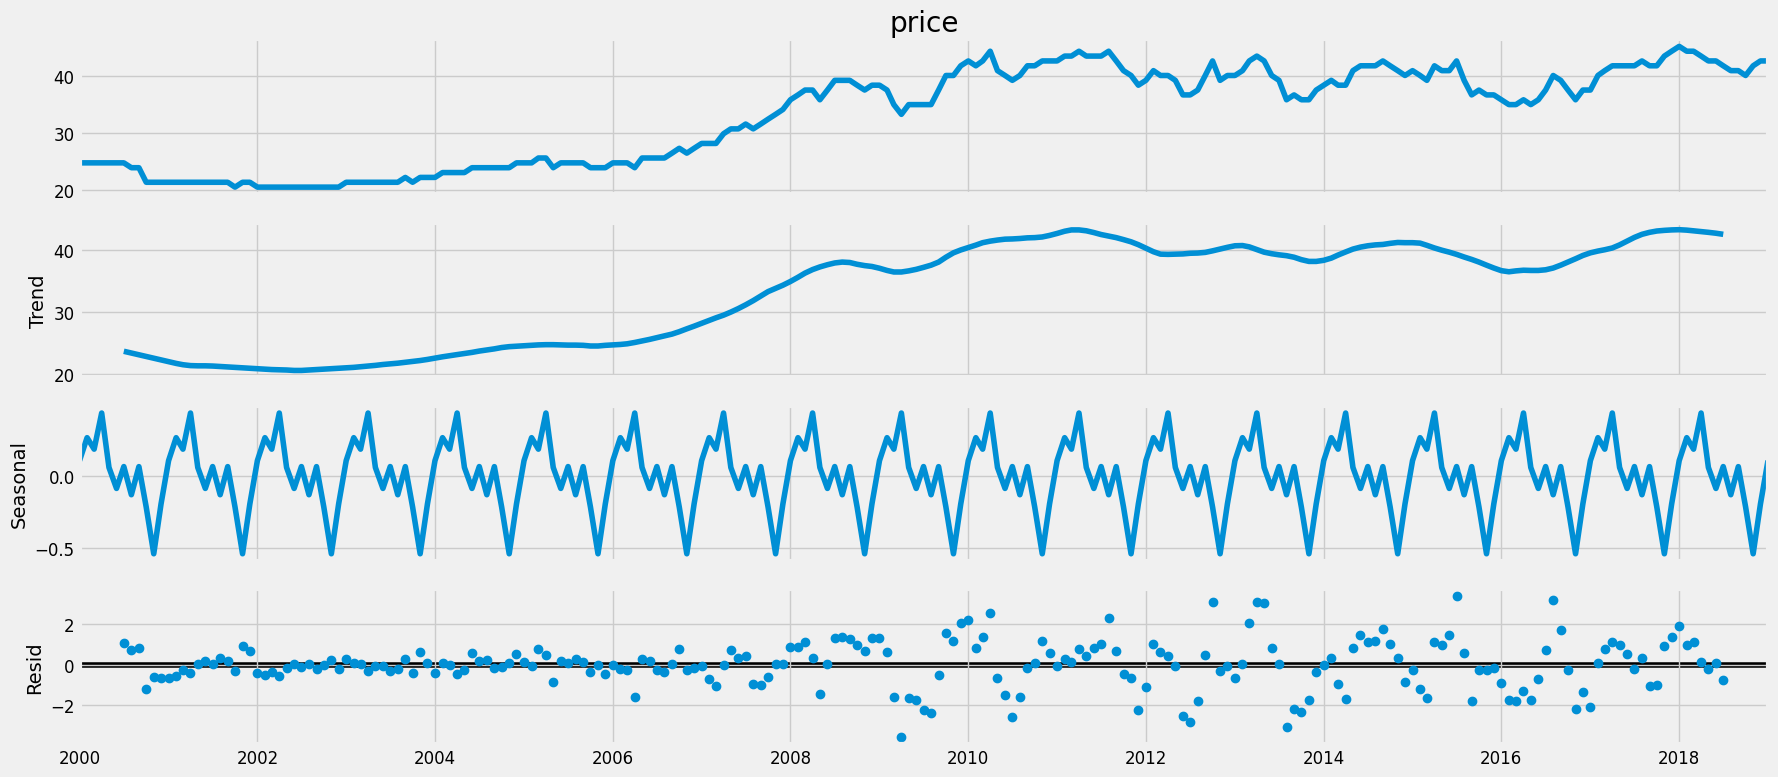

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

In [16]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [17]:
data = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_month.Weighted_Price_box,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

            data.append({'parameters' : [param], 'aic' : [results.aic]})
        except:

            continue

rt=pd.DataFrame(data)
rt

""


In [18]:
mod = sm.tsa.statespace.SARIMAX(df,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5975      0.348     -1.716      0.086      -1.280       0.085
ma.L1          0.6855      0.320      2.142      0.032       0.058       1.313
ar.S.L12      -0.5264      0.055     -9.487      0.000      -0.635      -0.418
sigma2         1.9600      0.174     11.255      0.000       1.619       2.301


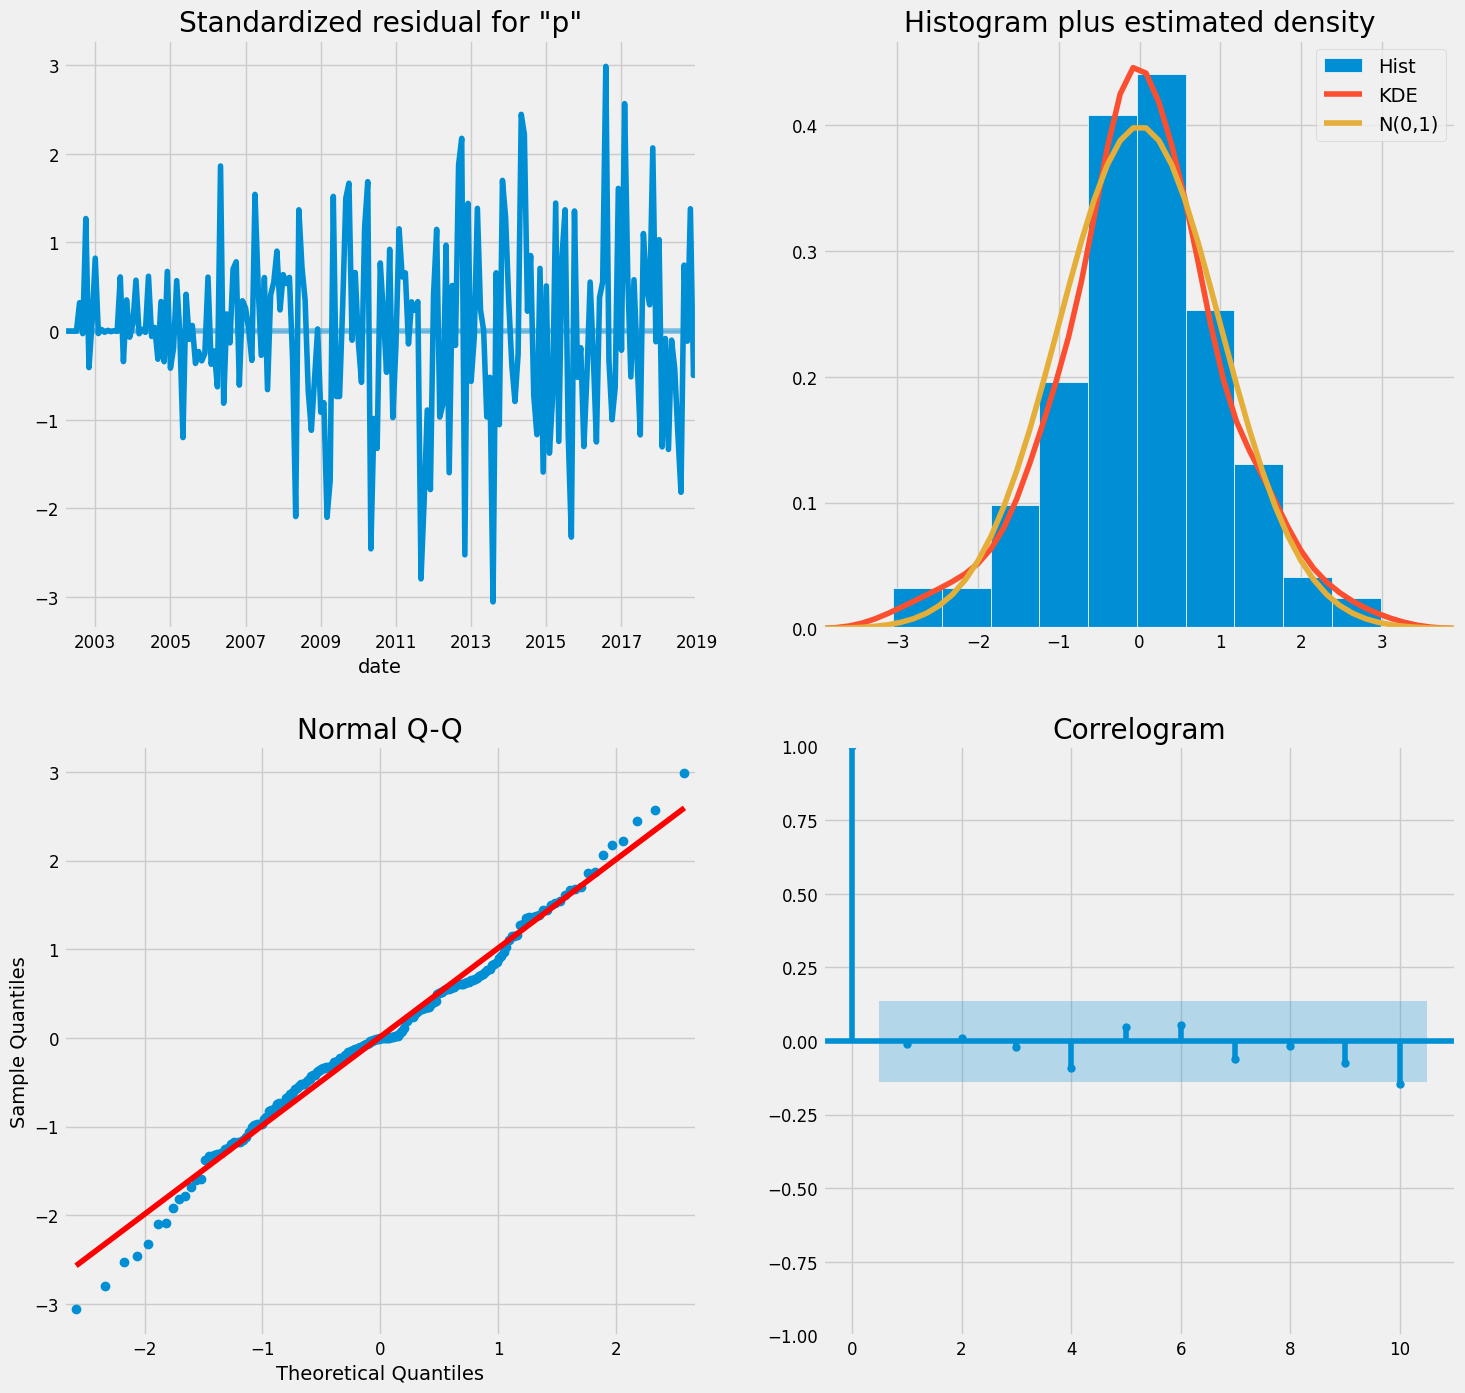

In [19]:
results.plot_diagnostics(figsize=(16, 16))
plt.show()

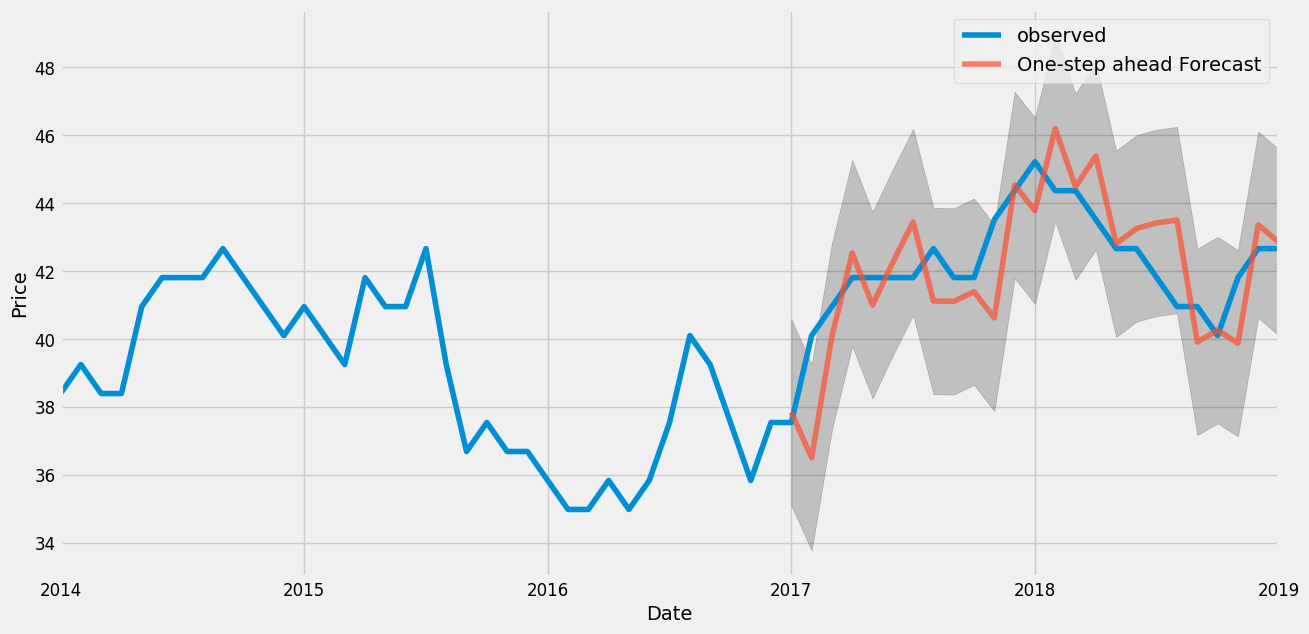

In [20]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

In [21]:
df_forecasted = pred.predicted_mean
df_truth = df['2017-01-01':]
mse = ((df_forecasted - df_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2.12


In [22]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Root Mean Squared Error of our forecasts is 1.46


In [23]:
#Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(df_truth, df_forecasted )/ df_truth))) * 100
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE, 2)) + ' %')

Mean Absolute Percentage Error (MAPE): 2.69 %


In [24]:
#Mean Percentage Error (MAPE)
MPE = np.mean((np.subtract(df_truth, df_forecasted )/ df_truth)) * 100
print('Mean Percentage Error (MPE): ' + str(np.round(MPE, 2)) + ' %')

Mean Percentage Error (MPE): 0.22 %


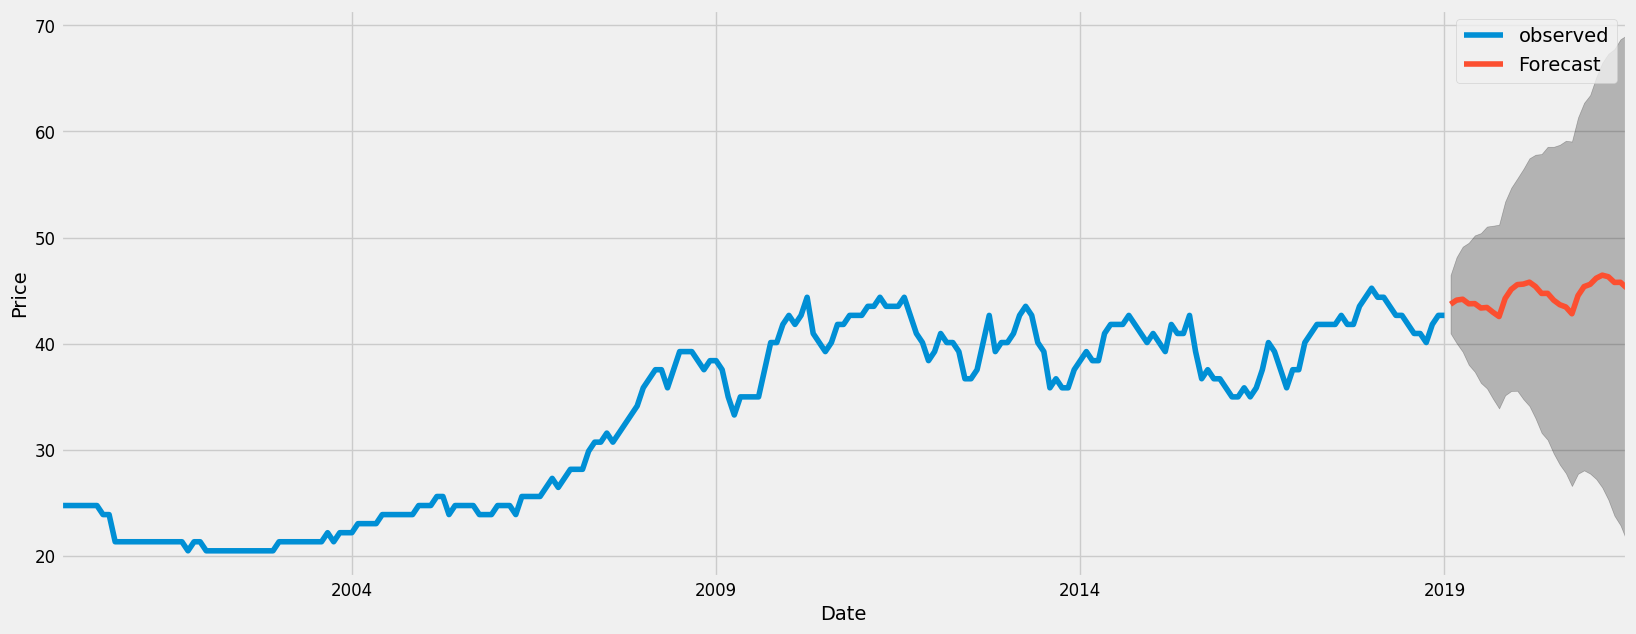

In [25]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = df.plot(label='observed', figsize=(18, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

In [26]:
pred_uc.predicted_mean

2019-02-01    43.717924
2019-03-01    44.101543
2019-04-01    44.185677
2019-05-01    43.758125
2019-06-01    43.772103
2019-07-01    43.359592
2019-08-01    43.409566
2019-09-01    42.957442
2019-10-01    42.555066
2019-11-01    44.260601
2019-12-01    45.114537
2020-01-01    45.563299
2020-02-01    45.613093
2020-03-01    45.794655
2020-04-01    45.385444
2020-05-01    44.733748
2020-06-01    44.740397
2020-07-01    44.095856
2020-08-01    43.670395
2020-09-01    43.456244
2020-10-01    42.816524
2020-11-01    44.522617
2020-12-01    45.376220
2021-01-01    45.588771
2021-02-01    46.166572
2021-03-01    46.454488
2021-04-01    46.304953
2021-05-01    45.771237
2021-06-01    45.781744
2021-07-01    45.259334
Freq: MS, Name: predicted_mean, dtype: float64